# Cifar100

In [ ]:
from torchvision.datasets.cifar import CIFAR100
CIFAR100(root="/content/cifar100/", train=True, download=True)

Files already downloaded and verified


Dataset CIFAR100
    Number of datapoints: 50000
    Root location: /content/cifar100/
    Split: Train

In [ ]:
import os
print(os.getcwd())


C:\Users\nv1n24\OneDrive - University of Southampton\PhD\Taught Modules\COMP6258\GroupWork\no-distillation\softlabel


In [ ]:
os.chdir(r"C:\Users\nv1n24\OneDrive - University of Southampton\PhD\Taught Modules\COMP6258\GroupWork\no-distillation\train_expert")

In [ ]:
import os
print(os.getcwd())


C:\Users\nv1n24\OneDrive - University of Southampton\PhD\Taught Modules\COMP6258\GroupWork


In [ ]:
# %cd no-distillation/train_expert
!python buffer.py --dataset=CIFAR100 --model=ConvNet --train_epochs=300 --num_experts=1  \
  --buffer_path=.  --data_path=/content/cifar100 --save_interval 1

Files already downloaded and verified
Files already downloaded and verified
Hyper-parameters: 
 {'dataset': 'CIFAR100', 'subset': 'imagenette', 'model': 'ConvNet', 'num_experts': 1, 'lr_teacher': 0.01, 'teacher_label': False, 'selection_strategy': 'random', 'batch_train': 256, 'batch_real': 256, 'dsa': True, 'dsa_strategy': 'color_crop_cutout_flip_scale_rotate', 'data_path': '/content/cifar100', 'buffer_path': '.', 'train_epochs': 300, 'zca': False, 'decay': False, 'mom': 0, 'l2': 0, 'save_interval': 1, 'device': device(type='cuda'), 'dsa_param': <softlabel.utils.ParamDiffAug object at 0x000001F04375DE50>, 'decoder': None}
BUILDING DATASET
BUILDING DATASET
class c = 0: 500 real images
class c = 1: 500 real images
class c = 2: 500 real images
class c = 3: 500 real images
class c = 4: 500 real images
class c = 5: 500 real images
class c = 6: 500 real images
class c = 7: 500 real images
class c = 8: 500 real images
class c = 9: 500 real images
class c = 10: 500 real images
class c = 11: 5


100%|##########| 50000/50000 [00:29<00:00, 1679.16it/s]

0it [00:00, ?it/s]
50000it [00:00, 1768226.51it/s]
C:\Users\nv1n24\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
os.chdir(r"C:\Users\nv1n24\OneDrive - University of Southampton\PhD\Taught Modules\COMP6258\GroupWork\no-distillation\softlabel")

In [ ]:
import os
print(os.getcwd())

C:\Users\nv1n24\OneDrive - University of Southampton\PhD\Taught Modules\COMP6258\GroupWork\no-distillation\softlabel


In [ ]:
import subprocess
import sys

runs = [
    (5, 24),     # IPC 5, epoch 24
 (10, 57),    # IPC 10, epoch 57
 (50, 125),   # IPC 50, epoch 125
 (100, 125),  # IPC 100, epoch 125
           ]


probabilities = [0.8, 0.9, 0.95, 1]


for ipc, epoch in runs:
  for prob in probabilities:
    command = [
            "python", "nodistill_GaussandShuffle.py",
            "--dataset=CIFAR100",
            f"--ipc={ipc}",
            "--expt_type=add_noise",
            "--teacher_label",
            f"--max_expert_epoch={epoch}",
            "--lr_net=1.e-02",
            "--expert_path=../train_expert",
            "--data_path=/content/cifar100",
            f"--true_class_probability={prob}",
            "--student_model=ConvNet",
            "--teacher_model=ConvNet",
            "--epoch_eval_train=3000",
            "--num_eval=1"
        ]
    print(f"\n▶️ Running: IPC={ipc}, Expert Epoch={epoch}, probability:{prob} \n")
    result = subprocess.run(command, capture_output=True, text=True)

      # Print stdout and stderr
    print(result.stdout)
      #print(result.stderr)

      # Save output to file
    log_filename = f"output_ipc{ipc}_epoch{epoch}_Noisy{prob}.txt"
    with open(log_filename, 'w') as f:
      f.write(result.stdout)
      f.write("\n--- STDERR ---\n")
      f.write(result.stderr)

    print(f"[✅] Output saved to {log_filename}")



▶️ Running: IPC=5, Expert Epoch=24, probability:0.8 

CUDNN STATUS: True
Files already downloaded and verified
Files already downloaded and verified
Hyper-parameters: 
 {'dataset': 'CIFAR100', 'data_path': '/content/cifar100', 'expert_path': '../train_expert', 'ipc': 5, 'teacher_model': 'ConvNet', 'student_model': 'ConvNet', 'epoch_eval_train': 3000, 'optimizer': 'SGD', 'lr_net': 0.01, 'true_class_probability': 0.8, 'expt_type': 'add_noise', 'num_eval': 1, 'batch_train': 256, 'batch_real': 256, 'zca': False, 'load_checkpoint': None, 'selection_strategy': 'random', 'dsa': True, 'dsa_strategy': 'color_crop_cutout_flip_scale_rotate', 'teacher_label': True, 'max_expert_epoch': 24, 'min_expert_epoch': 1, 'ensemble': False, 'temp': 1.0, 'wandb': False, 'run_name': None, 'notes': 'No description', 'device': 'cuda', 'im_size': [32, 32], 'dc_aug_param': None, 'dsa_param': <utils.ParamDiffAug object at 0x000001B4C2D40890>, '_wandb': {}, 'zca_trans': None, 'distributed': False}
Evaluation model:

C:\Users\nv1n24\AppData\Local\Temp\ipykernel_6912\2487782695.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load("../../labels_swapped_IPC10_ExpEpoch57_4

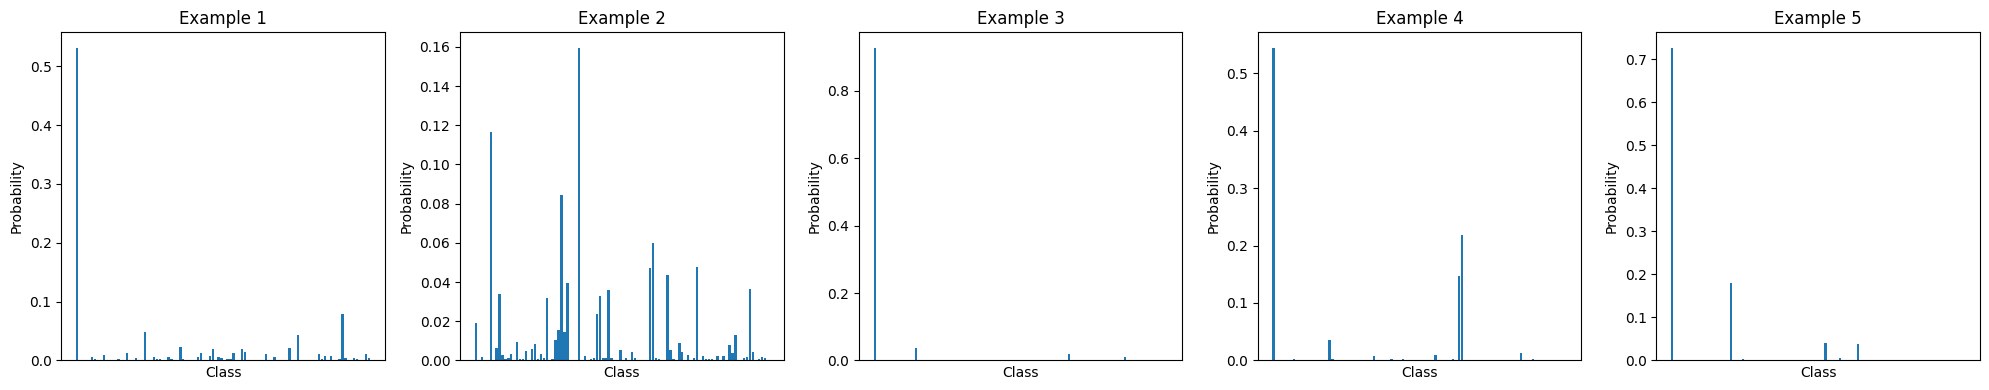

In [ ]:
import torch
import matplotlib.pyplot as plt
import random

# Load soft labels from file
labels = torch.load("../../labels_swapped_IPC10_ExpEpoch57_4.pt")  # Adjust path if needed

num_classes = labels.shape[1]
num_examples_to_visualize = 5

# Pick random samples
#example_indices = random.sample(range(len(labels)), num_examples_to_visualize)


# Pick non random sample
example_indices = list(range(num_examples_to_visualize))


plt.figure(figsize=(20, 4))

for i, idx in enumerate(example_indices):
    plt.subplot(1, num_examples_to_visualize, i + 1)
    plt.bar(range(num_classes), labels[idx].cpu().numpy())
    plt.title(f"Example {i + 1}")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks([])  # Hide class labels for cleaner look

plt.tight_layout()
plt.show()


In [ ]:
entropy_vals = []
for i in range(300):
  labels = torch.load(f"soft_labels_epoch_{i}.pt")
  entropy_image = -torch.sum(labels * torch.log(labels + 1e-10), axis=1)
  entropy_vals.append(torch.mean(entropy_image).cpu().numpy().item())

C:\Users\nv1n24\AppData\Local\Temp\ipykernel_25780\1868499417.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load(f"soft_labels_epoch_{i}.pt")


In [ ]:
entropy_vals

[4.492241382598877,
 4.354091644287109,
 4.21491003036499,
 4.083327770233154,
 3.9539976119995117,
 3.867548704147339,
 3.8047006130218506,
 3.658531904220581,
 3.5591037273406982,
 3.434518814086914,
 3.402005195617676,
 3.363887071609497,
 3.257476329803467,
 3.260608196258545,
 3.134767532348633,
 3.098748207092285,
 3.0096399784088135,
 3.0463619232177734,
 2.9384286403656006,
 2.870436191558838,
 2.8581669330596924,
 2.893280029296875,
 2.8230600357055664,
 2.749382495880127,
 2.7267887592315674,
 2.717005968093872,
 2.6611950397491455,
 2.6343836784362793,
 2.5985875129699707,
 2.595534563064575,
 2.5464959144592285,
 2.5607855319976807,
 2.5414011478424072,
 2.484488010406494,
 2.457017183303833,
 2.434696912765503,
 2.3879518508911133,
 2.3519034385681152,
 2.318274736404419,
 2.357288360595703,
 2.2881031036376953,
 2.3413453102111816,
 2.206984281539917,
 2.2591166496276855,
 2.215219259262085,
 2.1494297981262207,
 2.206542730331421,
 2.1656885147094727,
 2.1333487033843994